# Анализ многомерной случайной величины

## 1. Настройка среды

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,8)
sns.set_theme(style='darkgrid', palette='husl')

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston['data'])
df.columns = boston['feature_names']
df['MEDV'] = boston['target']
df.drop(['DIS','B'], axis = 1, inplace=True)

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,1.0,273.0,21.0,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


## 2. Описание датасета

Название датасета: Boston Housing  
Источник датасета: https://www.kaggle.com/c/boston-housing

**Признаки:**
- CRIM - количество преступлений на душу населения
- ZN - процент жилых участков площадью больше 25 тыс. кв. футов (~ 23 сотки)
- INDUS - процент площадей под оптовую торговлю 
- CHAS - протекает ли река
- NOX - концентрация оксидов азота
- RM - среднее число комнат в здании
- AGE - доля зданий, построенных до 1940 года 
- DIS - взвешенное расстояние до 5 деловых центров Бостона
- RAD - индекс доступности скоростных магистралей
- TAX - уровень налогов
- PTRATIO - среднее число учащихся на одного преподавателя 
- B - процент афроамериканцев
- LSTAT - процент граждан с низким уровнем жизни
- MEDV (целевой) - медианная стоимости домов в районе

## 3. Постановка задачи

### Задача

Минимизировать среднеквадратичную ошибку регрессии,задачей которого выступает прогноз медианной стоимости домов в районе 

## 4. Анализ случайных величин

In [5]:
#Дискретные величины
list_discr = ['ZN','CHAS','RAD','TAX']
#Непрерывные величины
list_cont = ['CRIM','INDUS','NOX','RM','AGE','PTRATIO','LSTAT','MEDV']

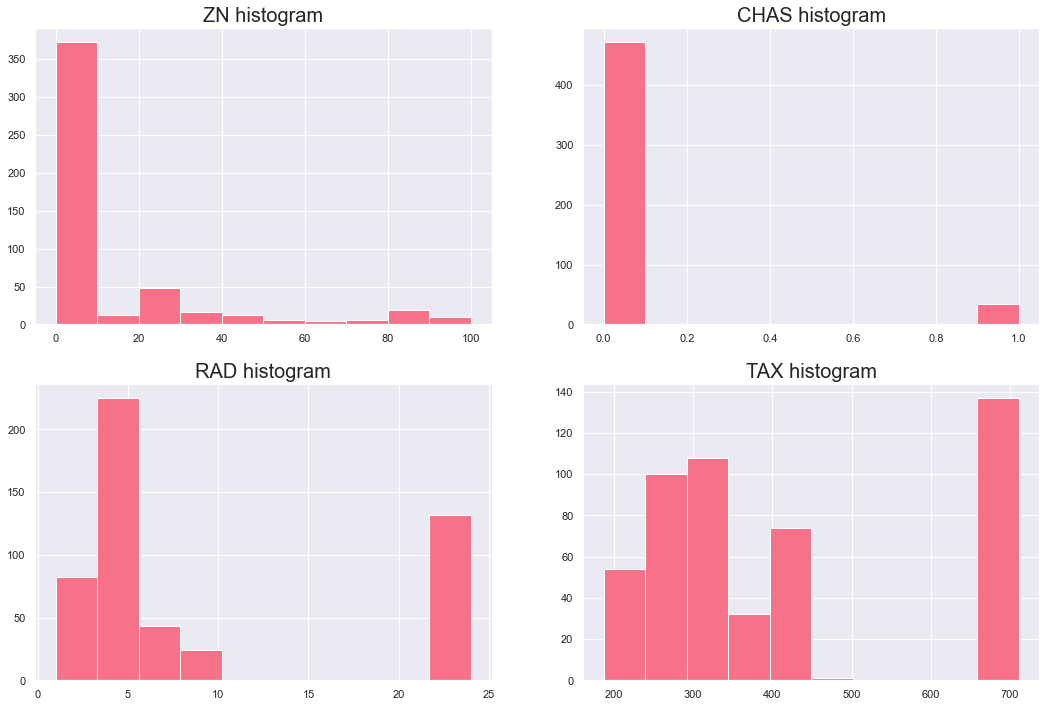

In [6]:
#Гистограммы дикретных величин
plt.figure(figsize=(18,12))
    
for i in list_discr:
    plt.subplot(2,2,list_discr.index(i)+1)
    plt.subplots_adjust(hspace=0.2)
    plt.title(i + ' histogram', fontsize=20)
    df[i].hist()

In [7]:
# Расчет оптимального количества столбцов гистограммы
def number_of_cols(df_num):
    rows = df_num.shape[0]
    num = np.around(1 + 3.32 * np.log(rows)).astype('int64')
    return num

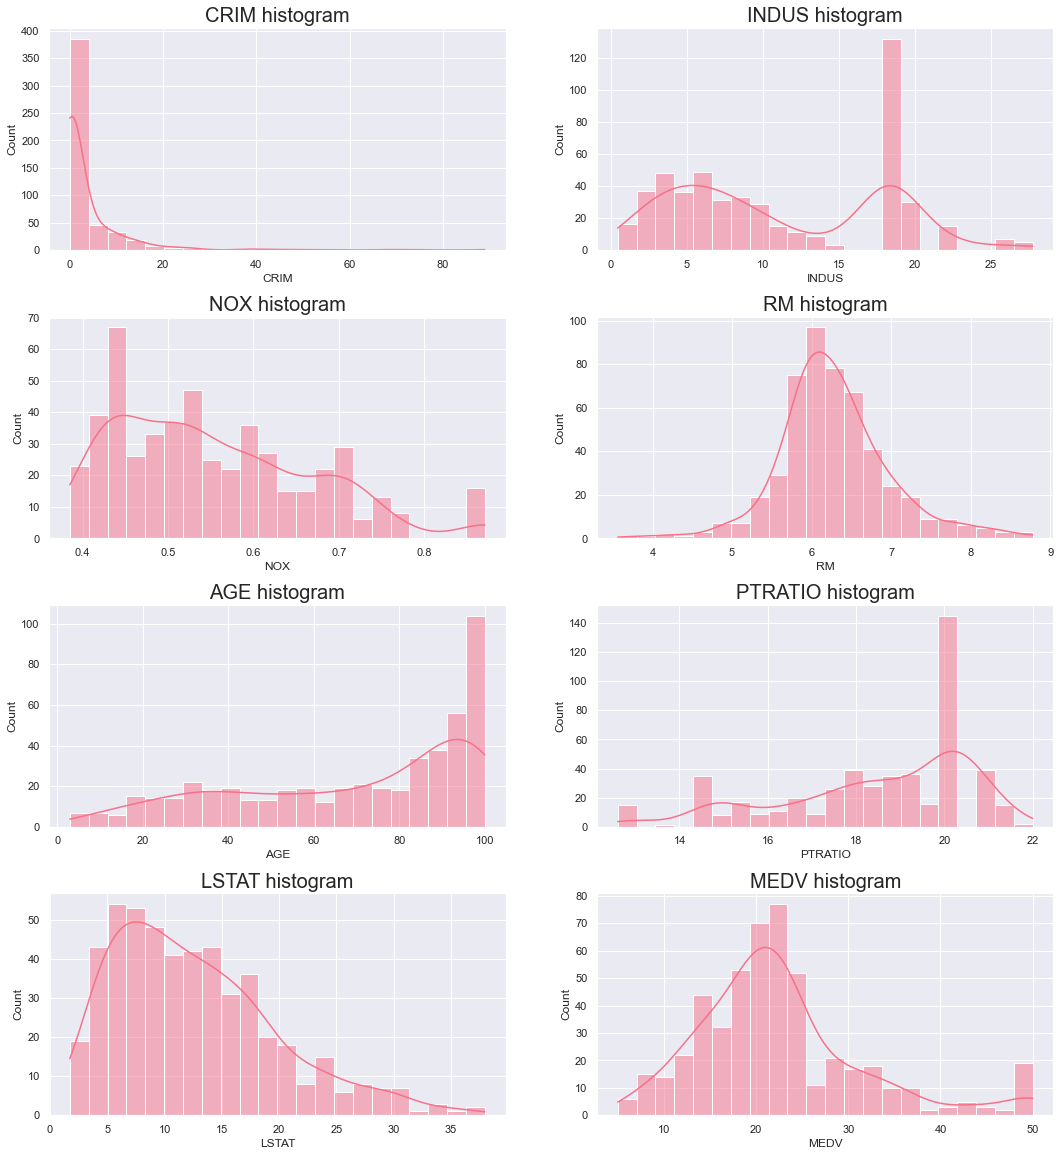

In [8]:
plt.figure(figsize=(18,20))

for i in list_cont:
    plt.subplot(4,2,list_cont.index(i)+1)
    plt.subplots_adjust(hspace=0.3)
    plt.title(i + ' histogram', fontsize=20)
    sns.histplot(data=df, x=i, kde=True, bins=number_of_cols(df))

In [9]:
df[list_cont].describe()

,CRIM,INDUS,NOX,RM,AGE,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,18.455534,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,12.600000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,17.400000,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,19.050000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,20.200000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,22.000000,37.970000,50.000000


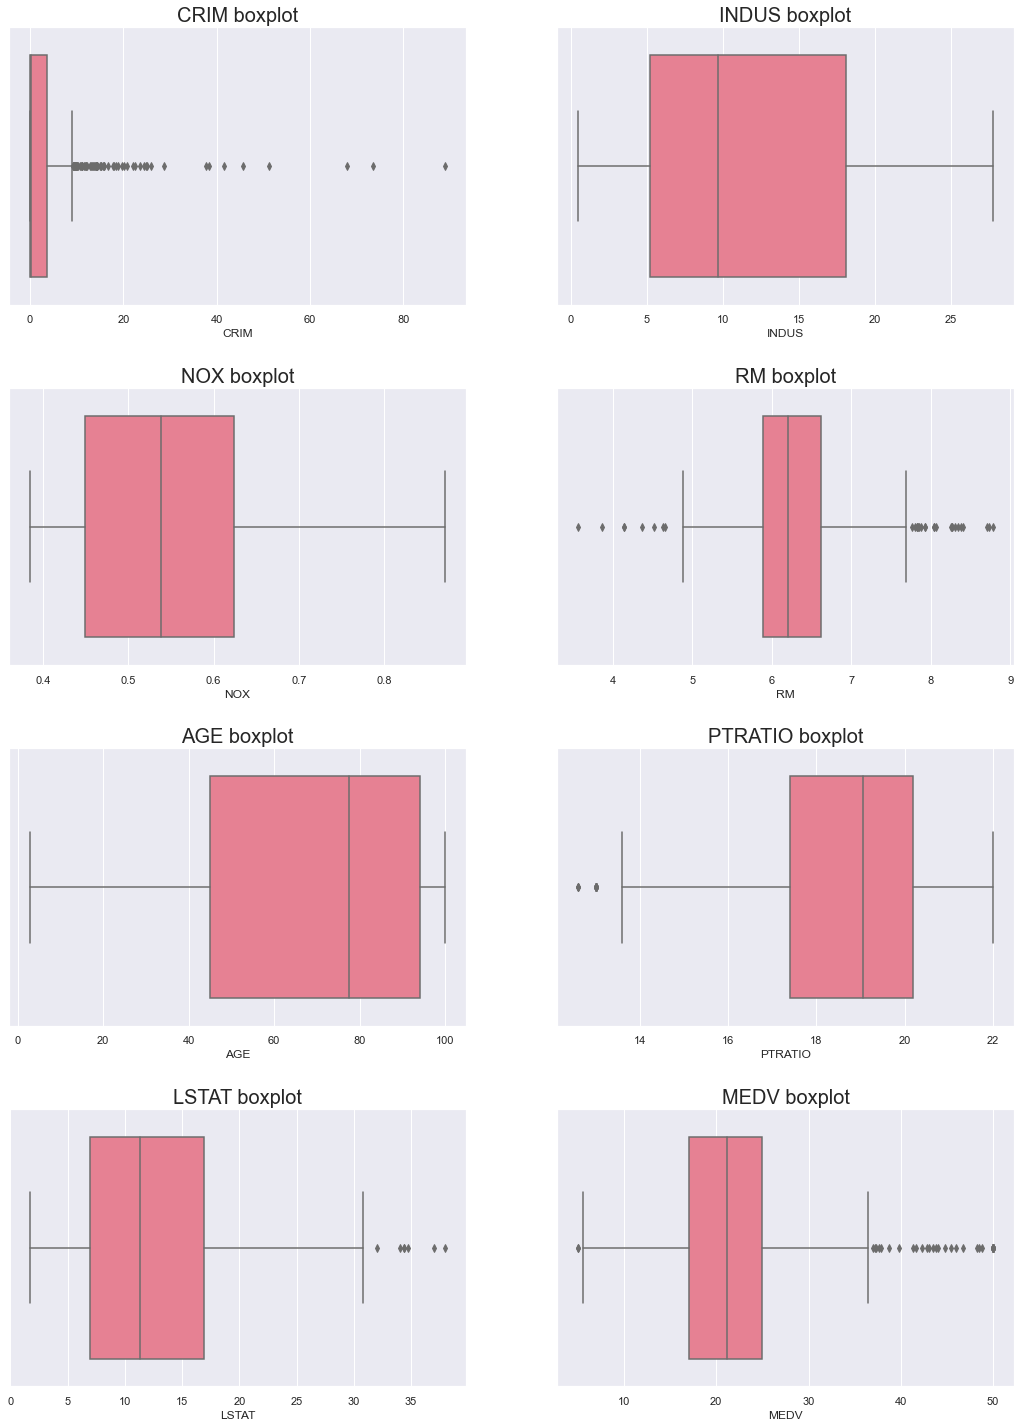

In [10]:
plt.figure(figsize=(18,25))

for i in list_cont:
    plt.subplot(4,2,list_cont.index(i)+1)
    plt.subplots_adjust(hspace=0.3)
    plt.title(i + ' boxplot', fontsize=20)
    sns.boxplot(data=df, x=i)

In [11]:
# Делаем усеченную выборку
def truncated_array(array, tail):
    array_trunc = []
    quantile_top, quantile_bot = np.percentile(array, tail)
    
    for i in array:
        if i < quantile_top and i > quantile_bot:
            array_trunc.append(i)
    return array_trunc

<AxesSubplot:title={'center':'CRIM histogram'}, ylabel='Count'>

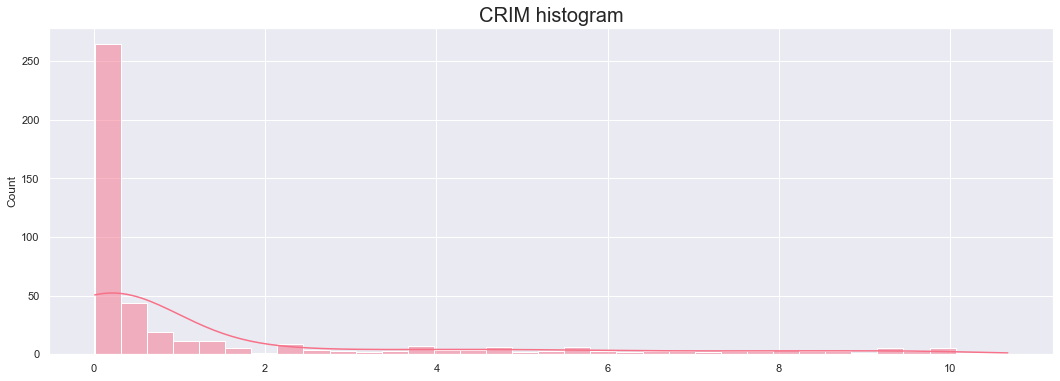

In [12]:
plt.figure(figsize=(18,6))

plt.title('CRIM histogram', fontsize=20)
sns.histplot(x=truncated_array(df['CRIM'], [90,0]), kde=True)

In [13]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,1.0,273.0,21.0,6.48,22.0


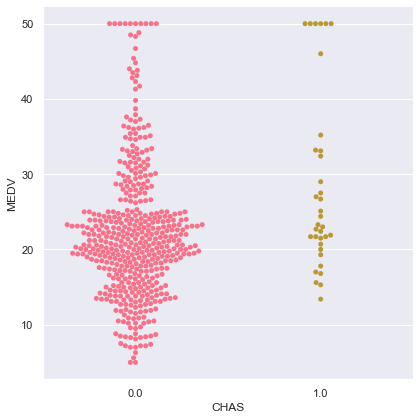

In [14]:
sns.catplot(x='CHAS',y='MEDV',kind='swarm',height=6,data=df)

## 5. Многомерная корреляция

<AxesSubplot:>

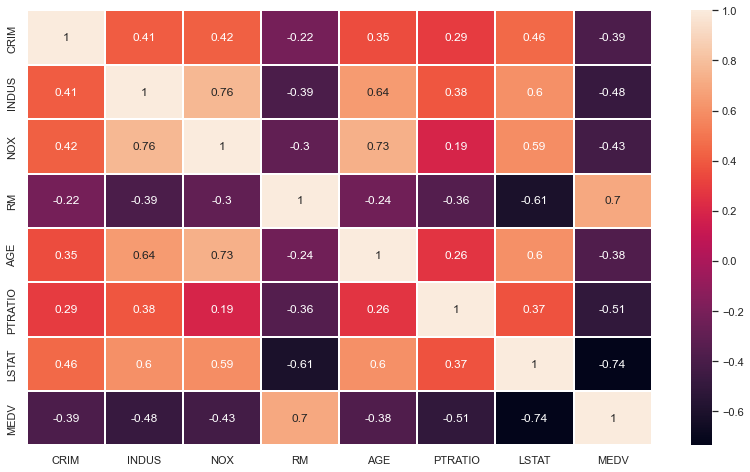

In [15]:
# Для непрерывных СВ
plt.figure(figsize=(14,8))
sns.heatmap(df[list_cont].corr(),annot=True, linewidths=0.25)

<AxesSubplot:>

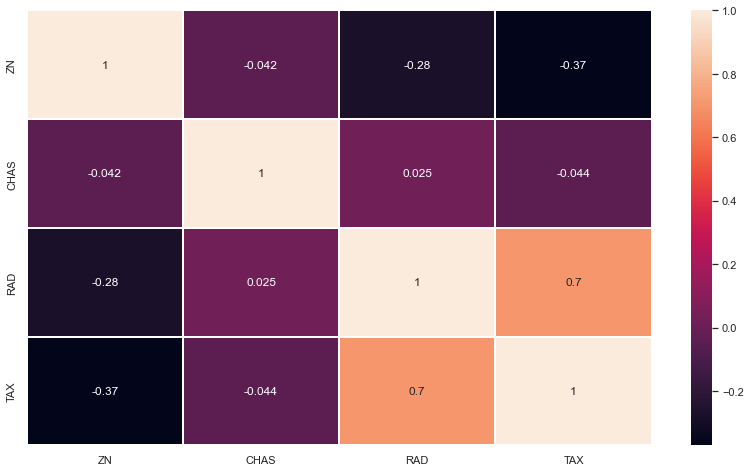

In [16]:
# Для дискретных СВ
plt.figure(figsize=(14,8))
sns.heatmap(df[list_discr].corr(method='spearman'),annot=True, linewidths=0.25)

<Figure size 1296x864 with 0 Axes>

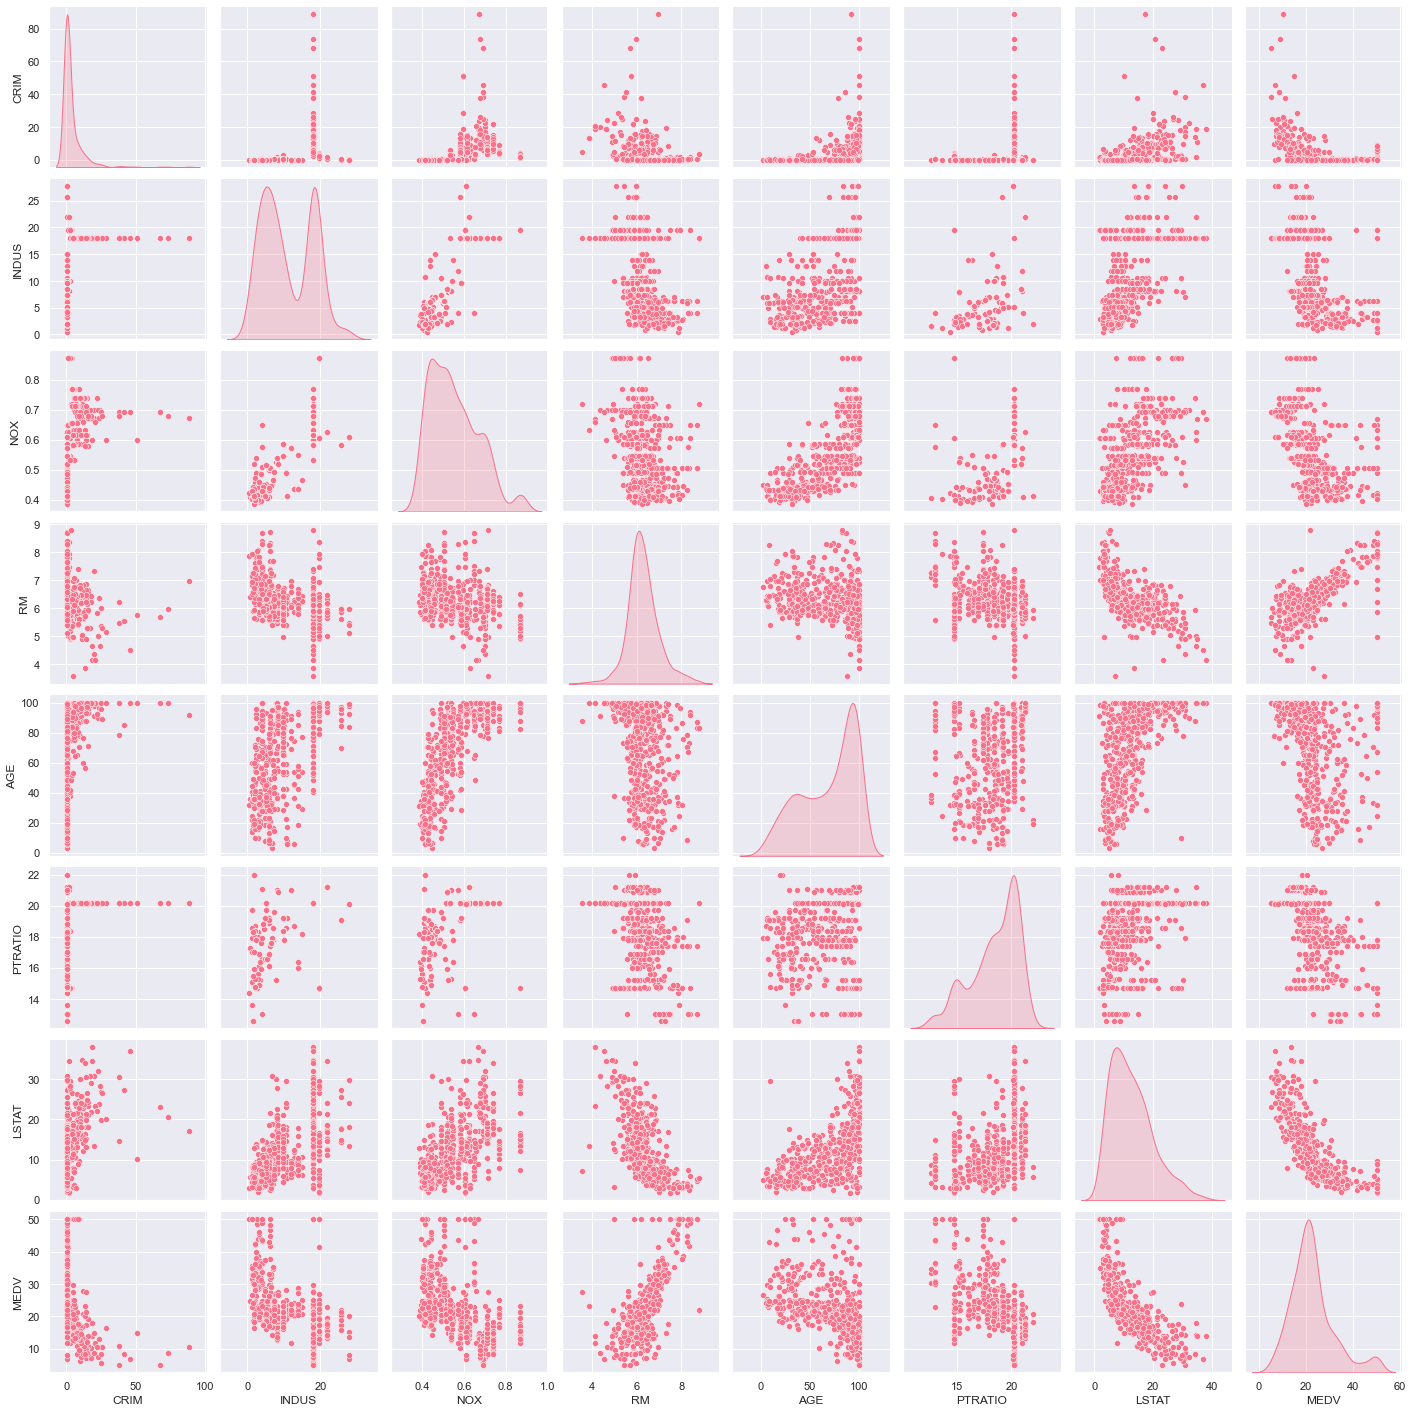

In [17]:
plt.figure(figsize=(18,12))

sns.pairplot(df[list_cont], diag_kind='kde')

## 6. Построение регрессионной модели

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [19]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [21]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

y_test_predict_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, lr.predict(X_test))
mse_lr = mean_squared_error(y_test, lr.predict(X_test))
r2_lr = r2_score(y_test, lr.predict(X_test))

print('Mean Absolute Error: {:.3f}'.format(mae_lr))
print('Mean Squared Error: {:.3f}'.format(mse_lr))
print('R2 Score: {:.3f}'.format(r2_lr))

Mean Absolute Error: 3.358
Mean Squared Error: 24.375
R2 Score: 0.673


### Lasso-регрессия

In [22]:
lasso = Lasso(alpha=0.15)
lasso.fit(X_train,y_train)

y_test_predict_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, lasso.predict(X_test))
mse_lasso = mean_squared_error(y_test, lasso.predict(X_test))
r2_lasso = r2_score(y_test, lasso.predict(X_test))

print('Mean Absolute Error: {:.3f}'.format(mae_lasso))
print('Mean Squared Error: {:.3f}'.format(mse_lasso))
print('R2 Score: {:.3f}'.format(r2_lasso))

Mean Absolute Error: 3.446
Mean Squared Error: 24.738
R2 Score: 0.668


In [23]:
# Подбор параметра alpha для lasso регрессии
n_alphas = 200
alphas = np.linspace(0.01, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.01      ,  0.06020101,  0.11040201,  0.16060302,  0.21080402,
        0.26100503,  0.31120603,  0.36140704,  0.41160804,  0.46180905,
        0.51201005,  0.56221106,  0.61241206,  0.66261307,  0.71281407,
        0.76301508,  0.81321608,  0.86341709,  0.91361809,  0.9638191 ,
        1.0140201 ,  1.06422111,  1.11442211,  1.16462312,  1.21482412,
        1.26502513,  1.31522613,  1.36542714,  1.41562814,  1.46582915,
        1.5160...
        8.29316583,  8.34336683,  8.39356784,  8.44376884,  8.49396985,
        8.54417085,  8.59437186,  8.64457286,  8.69477387,  8.74497487,
        8.79517588,  8.84537688,  8.89557789,  8.94577889,  8.9959799 ,
        9.0461809 ,  9.09638191,  9.14658291,  9.19678392,  9.24698492,
        9.29718593,  9.34738693,  9.39758794,  9.44778894,  9.49798995,
        9.54819095,  9.59839196,  9.64859296,  9.69879397,  9.74899497,
        9.79919598,  9.84939698,  9.89959799,  9.94979899, 10.        ]),
        cv=3, random_state=17

In [24]:
lasso_cv.alpha_

0.06020100502512563

In [25]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train,y_train)

y_test_predict_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, lasso.predict(X_test))
mse_lasso = mean_squared_error(y_test, lasso.predict(X_test))
r2_lasso = r2_score(y_test, lasso.predict(X_test))

print('Mean Absolute Error: {:.3f}'.format(mae_lasso))
print('Mean Squared Error: {:.3f}'.format(mse_lasso))
print('R2 Score: {:.3f}'.format(r2_lasso))

Mean Absolute Error: 3.407
Mean Squared Error: 24.879
R2 Score: 0.666


### Ridge-регрессия

In [26]:
ridge = Ridge(100)
ridge.fit(X_train, y_train)

y_test_predict_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, ridge.predict(X_test))
mse_ridge = mean_squared_error(y_test, ridge.predict(X_test))
r2_ridge = r2_score(y_test, ridge.predict(X_test))

print('Mean Absolute Error: {:.3f}'.format(mae_ridge))
print('Mean Squared Error: {:.3f}'.format(mse_ridge))
print('R2 Score: {:.3f}'.format(r2_ridge))

Mean Absolute Error: 3.584
Mean Squared Error: 25.320
R2 Score: 0.660


In [27]:
# Подбор параметра alpha для Ridge регрессии
n_alphas = 200
ridge_alphas = np.logspace(-10, 20, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-10, 1.41499130e-10, 2.00220037e-10, 2.83309610e-10,
       4.00880633e-10, 5.67242607e-10, 8.02643352e-10, 1.13573336e-09,
       1.60705282e-09, 2.27396575e-09, 3.21764175e-09, 4.55293507e-09,
       6.44236351e-09, 9.11588830e-09, 1.28989026e-08, 1.82518349e-08,
       2.58261876e-08, 3.65438307e-08, 5.17092024e-08, 7.31680714e-08,
       1.03532184e-07, 1.46497140e-0...
       3.40928507e+16, 4.82410870e+16, 6.82607183e+16, 9.65883224e+16,
       1.36671636e+17, 1.93389175e+17, 2.73644000e+17, 3.87203878e+17,
       5.47890118e+17, 7.75259749e+17, 1.09698580e+18, 1.55222536e+18,
       2.19638537e+18, 3.10786619e+18, 4.39760361e+18, 6.22257084e+18,
       8.80488358e+18, 1.24588336e+19, 1.76291412e+19, 2.49450814e+19,
       3.52970730e+19, 4.99450512e+19, 7.06718127e+19, 1.00000000e+20]),
        cv=3, scoring='neg_mean_squared_error')

In [28]:
ridge_cv.alpha_

3.5707859649004554

In [29]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

y_test_predict_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, ridge.predict(X_test))
mse_ridge = mean_squared_error(y_test, ridge.predict(X_test))
r2_ridge = r2_score(y_test, ridge.predict(X_test))

print('Mean Absolute Error: {:.3f}'.format(mae_ridge))
print('Mean Squared Error: {:.3f}'.format(mse_ridge))
print('R2 Score: {:.3f}'.format(r2_ridge))

Mean Absolute Error: 3.387
Mean Squared Error: 24.731
R2 Score: 0.668


In [113]:
# Доверительный интервал результатов регрессии
def conf_interval(y_test_predict, model):
    df_int = pd.DataFrame(columns = ['value','bot_bound','top_bound'])
    list_bot_int = []
    list_top_int = []
    n = len(y_test_predict)
    p = len(model.coef_) + 1
    scale = ((y_test_predict - y_test)**2).sum()/n

    for loc in y_test_predict:
        conf_int = scipy.stats.t.interval(0.05, df=n-p, loc=loc, scale=scale)
        list_bot_int.append(conf_int[0])
        list_top_int.append(conf_int[1])

    df_int['value'] = y_test_predict
    df_int['bot_bound'] = list_bot_int
    df_int['top_bound'] = list_top_int
    
    return df_int

In [114]:
conf_interval(y_test_predict_lr, lr)

,value,bot_bound,top_bound
0,27.104600,25.573387,28.635812
1,34.301013,32.769800,35.832225
2,14.922982,13.391769,16.454194
3,24.951371,23.420158,26.482583
4,18.509048,16.977835,20.040260
...,...,...,...
147,17.015305,15.484092,18.546518
148,14.097356,12.566143,15.628568
149,39.328179,37.796967,40.859392
150,19.581998,18.050785,21.113210


In [30]:
# График распределения ошибки регрессии
def error_scatter(y_test_predict):
    y_test.reset_index(drop=True, inplace=True)
    dif = y_test - y_test_predict
    plt.title('Error scatter', fontsize=20)
    plt.scatter(y_test.index, y_test - y_test_predict)

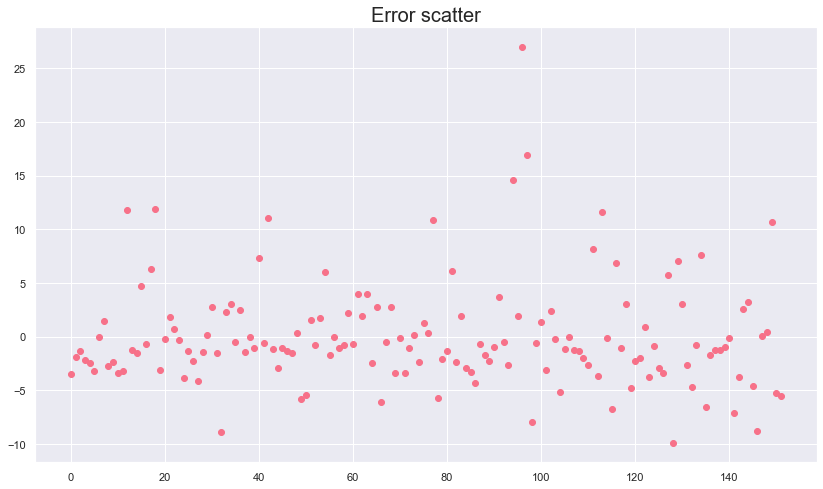

In [31]:
error_scatter(y_test_predict_lr)

In [32]:
# График сравнения предсказания и таргета
def predict_real_plot(y_test_predict):
    
    sns.scatterplot(y_test_predict, y_test)
    sns.lineplot(range(0, 50), range(0, 50), color='black', linestyle='--')
    plt.title('Compare target and prediction plot', fontsize=20)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.show()

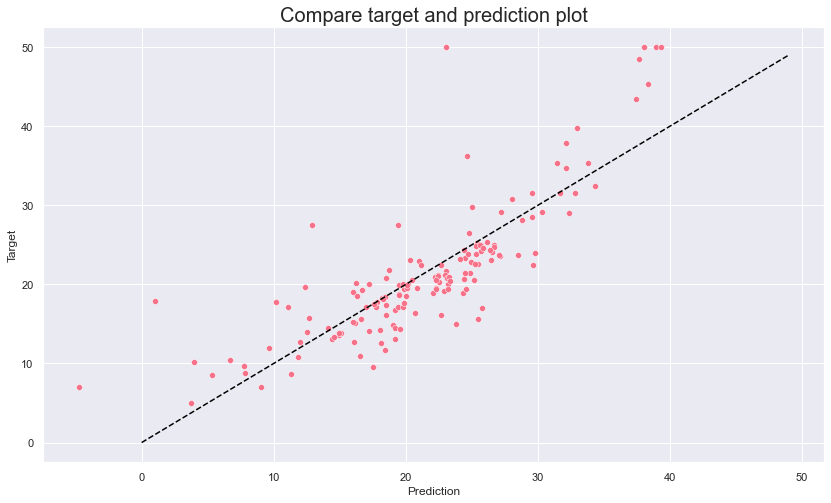

In [33]:
predict_real_plot(y_test_predict_lr)

In [34]:
# Корреляция предиканта с предсказанием и остатками
def corr_pred(y_test_predict):
    y_pred_corr = np.corrcoef(y_test, y_test_predict)[0][1]
    y_dif_corr = np.corrcoef(y_test, abs(y_test - y_test_predict))[0][1]
    
    print('Коэффициент корреляции между предиктантом и предсказанием: {:.3f}'.format(y_pred_corr))
    print('Коэффициент корреляции между предиктантом и остатками: {:.3f}'.format(y_dif_corr))

In [35]:
def return_corr(y_test_predict):
    y_pred_corr = np.corrcoef(y_test, y_test_predict)[0][1]
    return y_pred_corr

In [36]:
corr_pred(y_test_predict_lr)

Коэффициент корреляции между предиктантом и предсказанием: 0.821
Коэффициент корреляции между предиктантом и остатками: 0.358


In [37]:
# График теоретического нормального распределения остатков регрессии
def dif_norm(y_test_predict):   
    dif = y_test - y_test_predict
    plt.hist(dif, density=True, bins=30)
    dif_std = np.std(dif)
    dif_args = [0, dif_std]

    plt.title('Norm distribution of remnants ', fontsize=20)
    x_plot = np.linspace(np.min(dif), np.max(dif), 100)
    y_plot = scipy.stats.norm.pdf(x_plot, *dif_args)
    sns.lineplot(x_plot, y_plot)

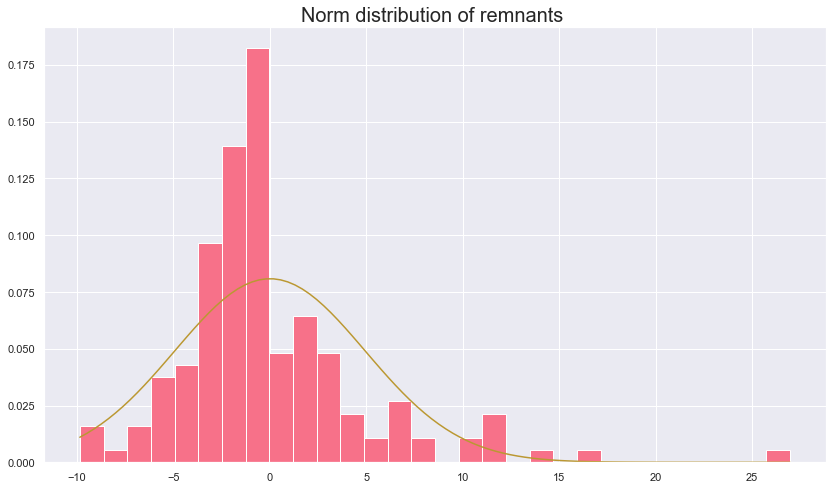

In [38]:
dif_norm(y_test_predict_lr)

In [39]:
# Квантильный биплот распределния осотатков регресии и нормального распределения
def dif_norm_biplot(y_test_predict):
    
    dif = y_test - y_test_predict
    dif_std = np.std(dif)
    dif_args = [0, dif_std]
    
    figure, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    scipy.stats.probplot(dif, dist=scipy.stats.norm, sparams=(dif_args), plot=ax)
    ax.get_lines()[1].set_color('black')
    plt.title('Norm distribution biplot', fontsize=20)

    plt.show()

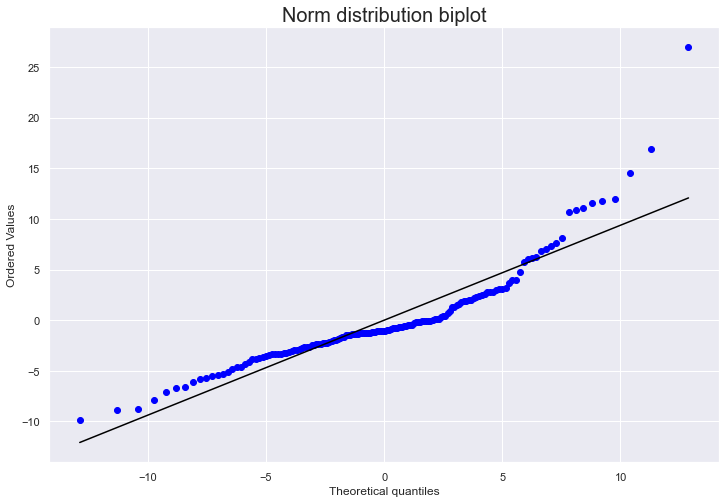

In [40]:
dif_norm_biplot(y_test_predict_lr)

In [41]:
# Статистические тесты Колмагорова-Смирнова и Омега-квадрат
def stat_test(y_test_predict):
    dif = y_test - y_test_predict
    dif_std = np.std(dif)
    dif_args = [0, dif_std]
    cdf = 'norm'
    
    kstest = scipy.stats.kstest(dif, cdf=cdf, args=dif_args).pvalue
    omega2 = scipy.stats.cramervonmises(dif, cdf=cdf, args=dif_args).pvalue

    print('Критерий Колмогорова-Смирнова: {:.4f}'.format(kstest))
    print('Критерий Омега-квадрат: {:.4f}'.format(omega2))

In [42]:
stat_test(y_test_predict_lr)

Критерий Колмогорова-Смирнова: 0.0002
Критерий Омега-квадрат: 0.0017


In [43]:
mod = sm.OLS(y_train, X_train)
res = mod.fit()
    
df1 = pd.DataFrame(res.params)
df2 = pd.DataFrame(res.conf_int(0.05))
new_df = pd.concat([df1, df2], axis=1)
new_df.columns = ['params', 'bot_bound', 'top_bound']
    
new_df 

,params,bot_bound,top_bound
CRIM,-0.110390,-0.197088,-0.023693
ZN,0.011891,-0.021970,0.045751
INDUS,0.060942,-0.092032,0.213915
CHAS,3.722402,1.514399,5.930405
NOX,2.467019,-5.971591,10.905630
RM,5.812462,5.074123,6.550802
AGE,0.005976,-0.026486,0.038438
RAD,0.071606,-0.092785,0.235997
TAX,-0.006051,-0.015876,0.003774
PTRATIO,-0.445215,-0.673948,-0.216483


### Полиномиальная регрессия

In [44]:
poly = PolynomialFeatures(2)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
reg = LinearRegression(normalize=True)
reg.fit(X_train_new, y_train)
y_test_predict_poly = reg.predict(X_test_new)

mae_poly = mean_absolute_error(y_test, y_test_predict_poly)
mse_poly = mean_squared_error(y_test, y_test_predict_poly)
r2_poly = r2_score(y_test, y_test_predict_poly)

print('Mean Absolute Error: {:.3f}'.format(mae_poly))
print('Mean Squared Error: {:.3f}'.format(mse_poly))
print('R2 Score: {:.3f}'.format(r2_poly))

Mean Absolute Error: 2.566
Mean Squared Error: 14.204
R2 Score: 0.809


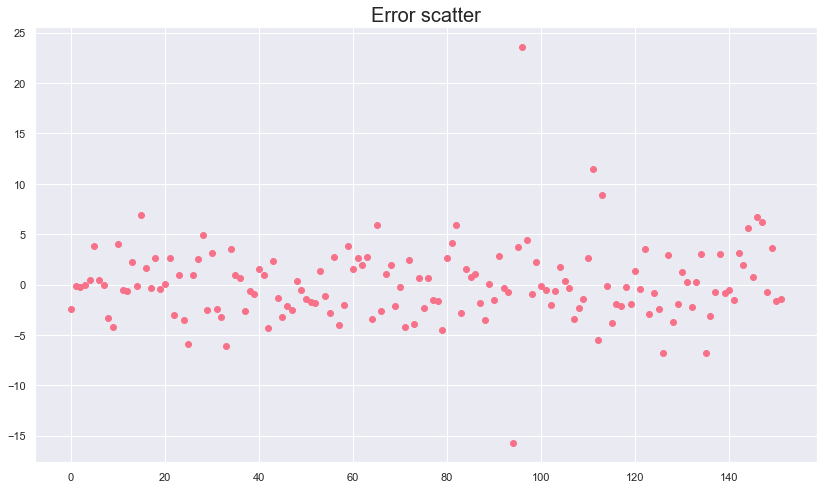

In [45]:
error_scatter(y_test_predict_poly)

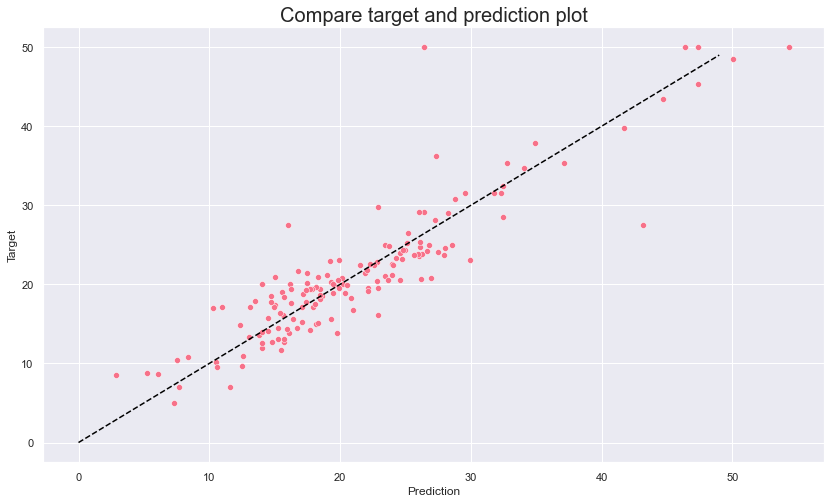

In [46]:
predict_real_plot(y_test_predict_poly)

In [47]:
corr_pred(y_test_predict_poly)

Коэффициент корреляции между предиктантом и предсказанием: 0.905
Коэффициент корреляции между предиктантом и остатками: 0.216


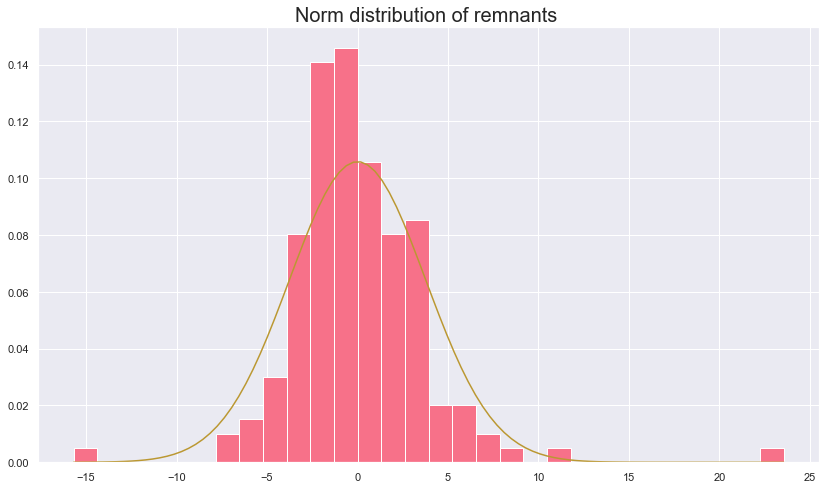

In [48]:
dif_norm(y_test_predict_poly)

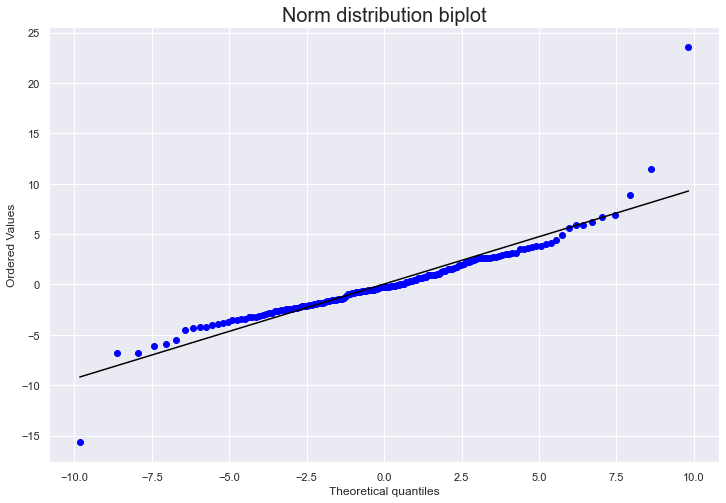

In [49]:
dif_norm_biplot(y_test_predict_poly)

In [50]:
stat_test(y_test_predict_poly)

Критерий Колмогорова-Смирнова: 0.2678
Критерий Омега-квадрат: 0.0958


In [51]:
poly = PolynomialFeatures(2)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)


mod = sm.OLS(y_train, X_train_new)
res = mod.fit()
    
df1 = pd.DataFrame(res.params)
df2 = pd.DataFrame(res.conf_int(0.05))
new_df = pd.concat([df1, df2], axis=1)
new_df.columns = ['params', 'bot_bound', 'top_bound']
    
new_df 

,params,bot_bound,top_bound
const,-105.851934,-256.177293,44.473425
x1,-9.854359,-27.348396,7.639678
x2,-0.133955,-0.908127,0.640217
x3,-3.172257,-6.399829,0.055315
x4,32.522744,12.480384,52.565105
...,...,...,...
x73,0.006307,0.000659,0.011956
x74,-0.000588,-0.002708,0.001532
x75,0.017271,-0.124575,0.159116
x76,-0.000908,-0.067121,0.065305


### Случайный лес

In [52]:
rfr =  RandomForestRegressor(n_estimators = 50 , random_state=1)
rfr.fit(X_train, y_train)
y_test_predict_rfr = rfr.predict(X_test)

mae_rfr = mean_absolute_error(y_test, y_test_predict_rfr)
mse_rfr = mean_squared_error(y_test, y_test_predict_rfr)
r2_rfr = r2_score(y_test, y_test_predict_rfr)

print('Mean Absolute Error: {:.3f}'.format(mae_rfr))
print('Mean Squared Error: {:.3f}'.format(mse_rfr))
print('R2 Score: {:.3f}'.format(r2_rfr))

Mean Absolute Error: 2.185
Mean Squared Error: 11.117
R2 Score: 0.851


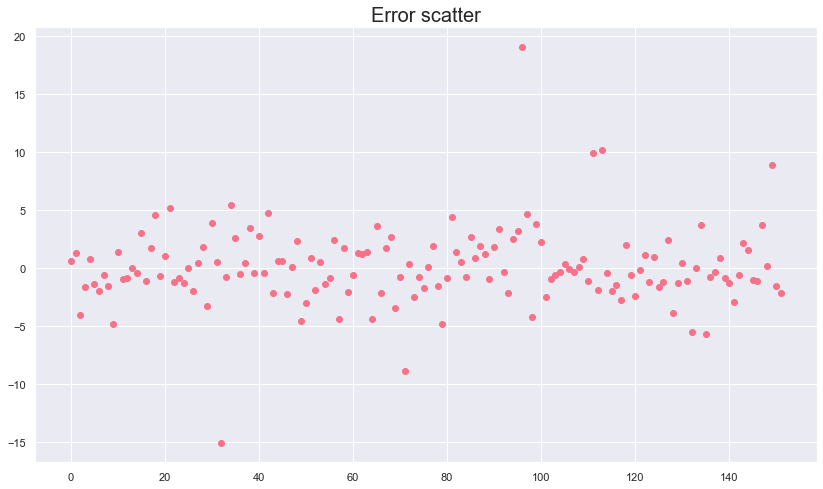

In [53]:
error_scatter(y_test_predict_rfr)

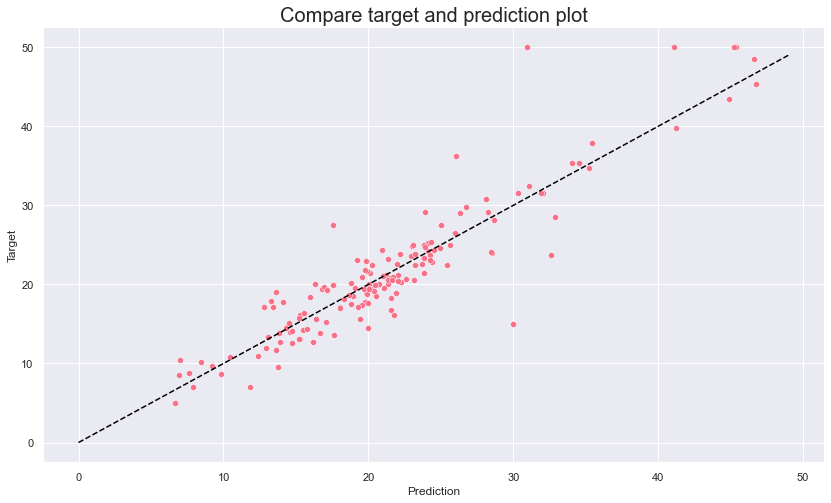

In [54]:
predict_real_plot(y_test_predict_rfr)

In [55]:
corr_pred(y_test_predict_rfr)

Коэффициент корреляции между предиктантом и предсказанием: 0.923
Коэффициент корреляции между предиктантом и остатками: 0.259


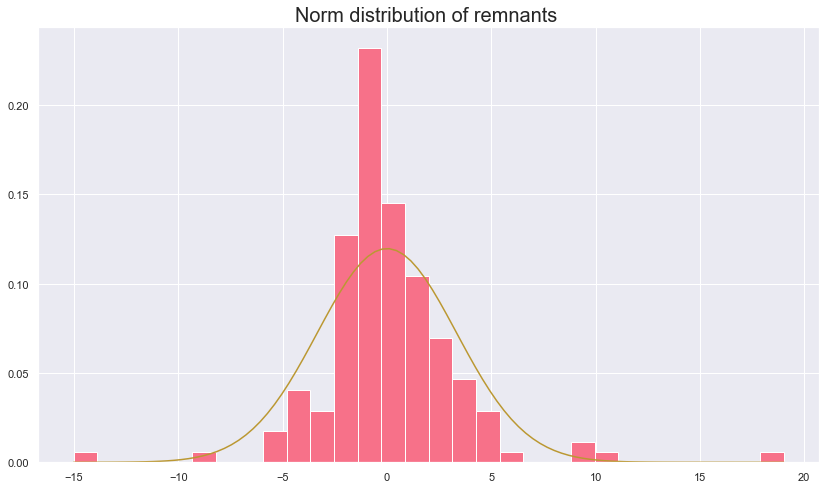

In [56]:
dif_norm(y_test_predict_rfr)

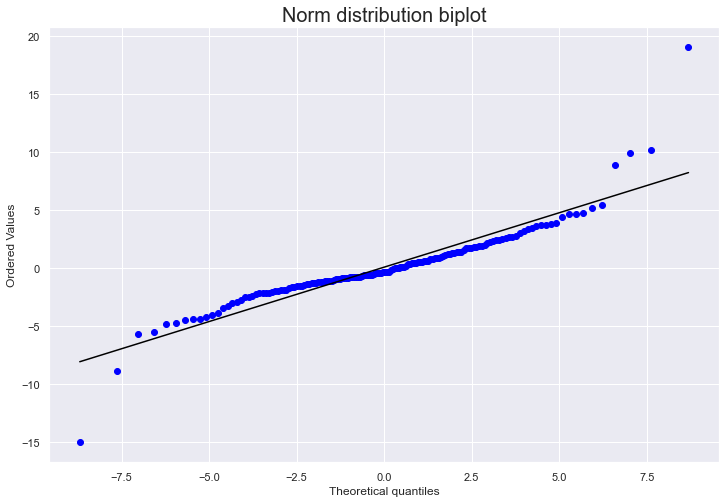

In [57]:
dif_norm_biplot(y_test_predict_rfr)

In [58]:
stat_test(y_test_predict_rfr)

Критерий Колмогорова-Смирнова: 0.0197
Критерий Омега-квадрат: 0.0208


Text(0.5, 1.0, 'Сравнение корреляции между предиктантом и предсказанием')

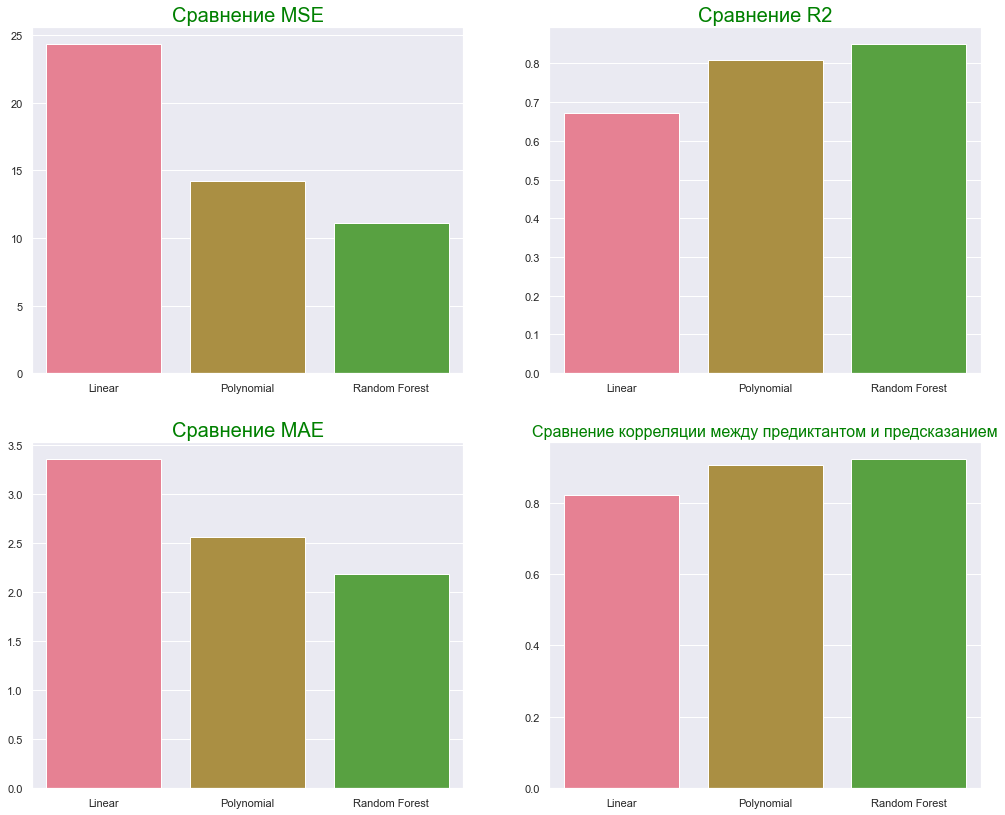

In [59]:
indexx = ["Linear","Polynomial","Random Forest"]
mse_val = [mse_lr,mse_poly, mse_rfr]
r2_val = [r2_lr,r2_poly, r2_rfr]
corr_val = [return_corr(y_test_predict_lr), return_corr(y_test_predict_poly), return_corr(y_test_predict_rfr)]
mae_val = [mae_lr,mae_poly, mae_rfr]

plt.figure(figsize=(17,14))

plt.subplot(2,2,1)
sns.barplot(x=indexx,y=mse_val)
plt.title('Сравнение MSE',color = 'green',fontsize=20)

plt.subplot(2,2,2)
sns.barplot(x=indexx,y=r2_val)
plt.title('Сравнение R2',color = 'green',fontsize=20)

plt.subplot(2,2,3)
sns.barplot(x=indexx,y=mae_val)
plt.title('Сравнение MAE',color = 'green',fontsize=20)

plt.subplot(2,2,4)
sns.barplot(x=indexx,y=corr_val)
plt.title('Сравнение корреляции между предиктантом и предсказанием',color = 'green',fontsize=16)

In [60]:
from sklearn.preprocessing import KBinsDiscretizer
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
import networkx as nx
from pgmpy.estimators import HillClimbSearch, K2Score, BicScore

In [61]:
# df_transformed = df.copy()
# discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')
# df_discretized = discretizer.fit_transform(df.values[:, [0, 2, 4, 5]])
# df_transformed[['CRIM', 'INDUS', 'NOX', 'RM']] = df_discretized

In [62]:
df_new = df.copy()
df_new['CRIM'] = pd.qcut(df_new['CRIM'], 10, labels=False)
# df['INDUS'] = pd.qcut(df['INDUS'], 10, labels=False)
df_new['NOX'] = pd.qcut(df_new['NOX'], 10, labels=False)
df_new['RM'] = pd.qcut(df_new['RM'], 10, labels=False)
df_new['AGE'] = pd.qcut(df_new['AGE'], 10, labels=False)
# df['PTRATIO'] = pd.qcut(df['PTRATIO'], 10, labels=False)
df_new['LSTAT'] = pd.qcut(df_new['LSTAT'], 10, labels=False)
# df['MEDV'] = pd.qcut(df['MEDV'], 10, labels=False)

In [63]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['ZN',"INDUS",'TAX','PTRATIO'])
df_new = encoder.fit_transform(df_new)

In [64]:
df_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,1,1,0.0,4,7,3,1.0,1,1,1,24.0
1,0,2,2,0.0,2,6,5,2.0,2,2,3,21.6
2,0,2,2,0.0,2,9,3,2.0,2,2,0,34.7
3,0,2,3,0.0,2,8,2,3.0,3,3,0,33.4
4,2,2,3,0.0,2,8,3,3.0,3,3,1,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,2,76,0.0,5,7,4,1.0,66,5,4,22.4
502,1,2,76,0.0,5,4,4,1.0,66,5,3,20.6
503,1,2,76,0.0,5,8,6,1.0,66,5,1,23.9
504,3,2,76,0.0,5,8,6,1.0,66,5,2,22.0


In [65]:
edges_list = [
    ('RM', 'MEDV'),
    ('LSTAT', 'MEDV'),
    ('AGE', 'NOX'),
    ('NOX', 'INDUS'),
    ('CRIM', 'LSTAT'),
    ('INDUS', 'LSTAT'),
    ('ZN', 'RAD'),
    ('RAD', 'TAX'),
    ('TAX', 'NOX')
]

model = BayesianModel(edges_list)

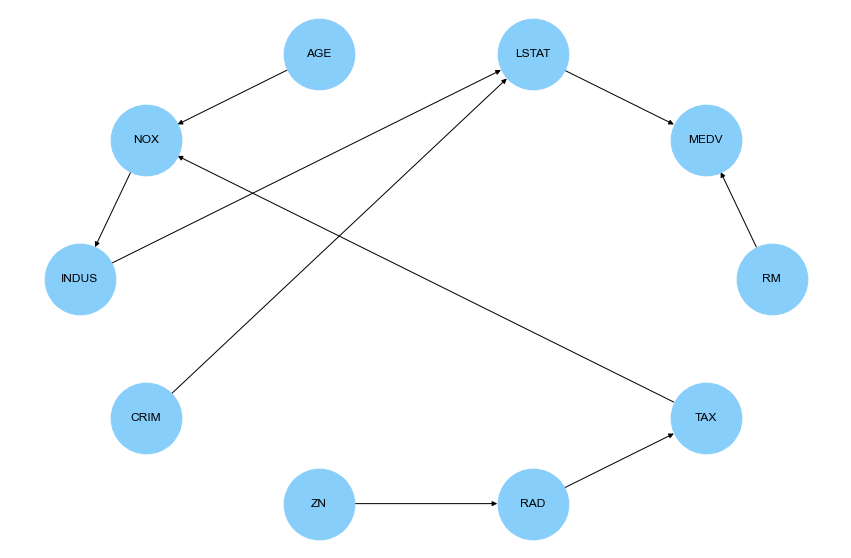

In [66]:
figure, ax = plt.subplots(1, 1, figsize=(15, 10))

graph = nx.DiGraph()
graph.add_edges_from(model.edges())

positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

In [67]:
hc_search = HillClimbSearch(data=df_new)
hc_k2 = hc_search.estimate(scoring_method=K2Score(df_new))
hc_bic = hc_search.estimate(scoring_method=BicScore(df_new))

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

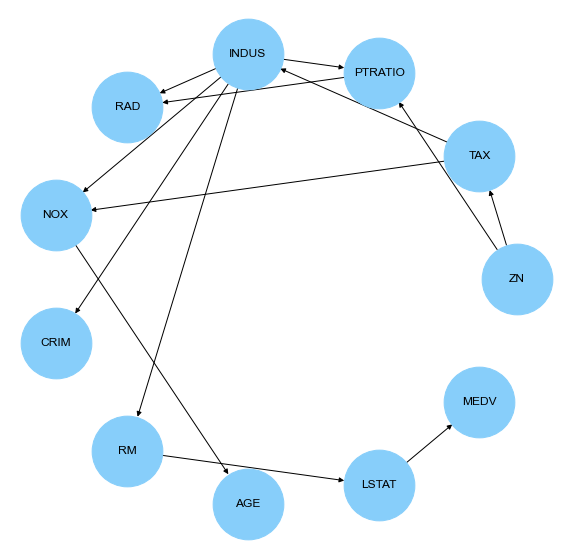

In [68]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(hc_k2.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

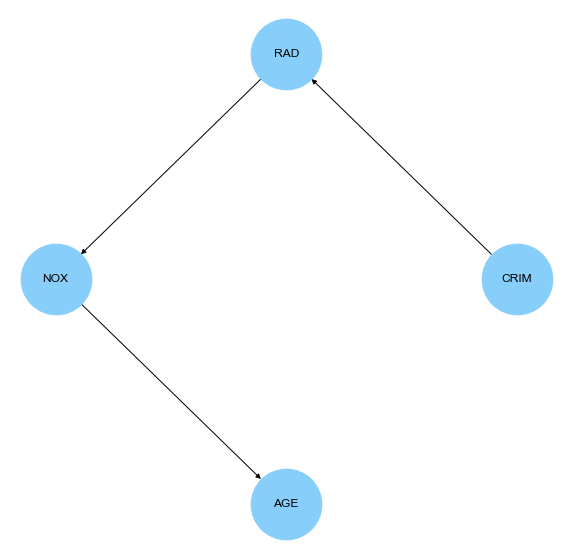

In [69]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(hc_bic.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

In [70]:
def bn_sample(model, data):
    model_s = BayesianModel(model.edges())
    model_s.fit(data)
    
    sampling = BayesianModelSampling(model_s)
    sample = sampling.forward_sample(size = data.shape[0])
    return sample

In [71]:
sample_k2 = bn_sample(hc_k2, df_new)
sample_model = bn_sample(model, df_new)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [72]:
mae_k2 = mean_absolute_error(df_new.MEDV, sample_k2.MEDV)
mse_k2 = mean_squared_error(df_new.MEDV, sample_k2.MEDV)
r2_k2 = r2_score(df_new.MEDV, sample_k2.MEDV)

print('Mean Absolute Error: {:.3f}'.format(mae_k2))
print('Mean Squared Error: {:.3f}'.format(mse_k2))
print('R2 Score: {:.3f}'.format(r2_k2))

Mean Absolute Error: 10.744
Mean Squared Error: 193.261
R2 Score: -1.289


In [73]:
mae_model = mean_absolute_error(df_new.MEDV, sample_model.MEDV)
mse_model = mean_squared_error(df_new.MEDV, sample_model.MEDV)
r2_model = r2_score(df_new.MEDV, sample_model.MEDV)

print('Mean Absolute Error: {:.3f}'.format(mae_model))
print('Mean Squared Error: {:.3f}'.format(mse_model))
print('R2 Score: {:.3f}'.format(r2_model))

Mean Absolute Error: 9.263
Mean Squared Error: 151.499
R2 Score: -0.795


In [117]:
# Доверительные интервалы результатов регрессии с помощью байесовской сети
df_int = pd.DataFrame(columns = ['value','bot_bound','top_bound'])
list_bot_int = []
list_top_int = []
n = len(sample_model.MEDV)
p = 2
scale = ((sample_model.MEDV - df_new.MEDV)**2).sum()/n

for loc in sample_model.MEDV:
    conf_int = scipy.stats.t.interval(0.05, df=n-p, loc=loc, scale=scale)
    list_bot_int.append(conf_int[0])
    list_top_int.append(conf_int[1])

df_int['value'] = sample_model.MEDV
df_int['bot_bound'] = list_bot_int
df_int['top_bound'] = list_top_int
    
df_int

,value,bot_bound,top_bound
0,18.2,8.695279,27.704721
1,13.4,3.895279,22.904721
2,22.6,13.095279,32.104721
3,24.4,14.895279,33.904721
4,36.5,26.995279,46.004721
...,...,...,...
501,16.6,7.095279,26.104721
502,24.8,15.295279,34.304721
503,21.9,12.395279,31.404721
504,22.8,13.295279,32.304721
